In [14]:

#@title The MIT License (MIT)
#
# Copyright (c) 2024 Eric dos Santos.
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.


# Introdução


Este notebook explora um projeto de **Regressão Linear Simples** aplicado à previsão de preços com base na quantidade de produtos vendidos. O objetivo é construir um modelo preditivo, avaliar sua eficácia e explorar a relação entre as variáveis analisadas.

## Etapas do Projeto

1. **Carregamento dos Dados**

Os dados utilizados são fictícios, simulados para representar a relação entre quantidade vendida e preço de venda (R$). Eles são carregados de um arquivo CSV:


**Colunas principais**:

- Quantidade Vendida: Número de unidades vendidas.
- Preço de Venda (R$): Valor total em reais.

2. **Visualização Inicial dos Dados**

Antes de realizar qualquer análise, eu considero fundamental compreender como as variáveis estão relacionadas. Por isso, eu gerei um gráfico de dispersão para explorar visualmente o padrão entre as variáveis independentes (X) e dependentes (Y).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Ler dos dados utilizados pelo modelo
df = pd.read_csv('product_data.csv')

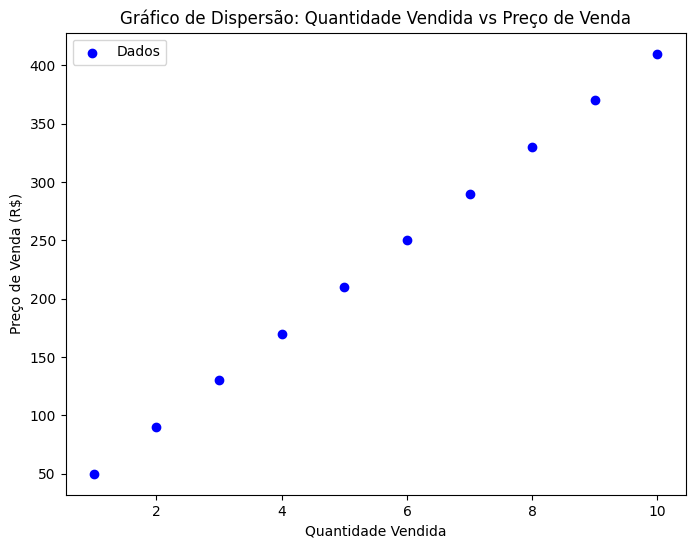

In [4]:
# Criar o gráfico de dispersão
plt.figure(figsize=(8, 6))  # Tamanho da figura
plt.scatter(df['Quantidade Vendida'], df['Preço de Venda (R$)'], color='blue', label='Dados')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão: Quantidade Vendida vs Preço de Venda')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Preço de Venda (R$)')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.show()

3. **Importação das Bibliotecas Necessárias**  

Para iniciar o processo de análise e modelagem, importei as bibliotecas essenciais. A classe `LinearRegression`, da biblioteca `sklearn.linear_model`, foi utilizada para construir o modelo de regressão linear. Além disso, a função `train_test_split`, da biblioteca `sklearn.model_selection`, foi importada para dividir os dados em conjuntos de treino e teste, garantindo uma separação eficiente e reprodutível dos dados.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

3. **Pré-processamento**

A variável independente foi separada como X e a dependente como Y. Para garantir a compatibilidade com o modelo de regressão, X foi transformado em uma matriz bidimensional:



In [6]:
# variável indenpendente
X = df.drop('Preço de Venda (R$)', axis=1)

# variável dependente
y = df['Preço de Venda (R$)']

4. **Divisão do Conjunto de Dado**

Para garantir uma análise robusta, eu separei o conjunto de dados em conjuntos de treino e teste. Utilizando a função train_test_split, reservei 20% dos dados para o conjunto de teste, enquanto 80% foram destinados ao conjunto de treino. Essa divisão foi realizada com um estado aleatório fixo (random_state=42) para garantir a reprodutibilidade dos resultados.

In [7]:
# separando o dataset em conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. **Treinamento do Modelo**

O modelo de Regressão Linear Simples foi ajustado utilizando a biblioteca scikit-learn. O ajuste é feito mapeando a relação linear entre Quantidade Vendida e Preço de Venda.

- **Modelo utilizado:** LinearRegression().

 - **Parâmetros ajustados:**

    - coef_: Representa o coeficiente angular da reta.
    - intercept_: Representa o ponto onde a reta cruza o eixo Y.

In [9]:
# Inicializa o modelo de regressão linear
model = LinearRegression()

# Treina o modelo utilizando os dados de treino
model.fit(X_train, y_train)

LinearRegression()

5. **Avaliação do Modelo**

A performance do modelo foi avaliada com o coeficiente de determinação $R^2$, que mede a proporção da variância explicada pela variável independente.

- Equação ajustada:

In [10]:
# Exibe a equação da reta ajustada pelo modelo de regressão linear
# Mostra o coeficiente angular (modelo.coef_[0]) e o intercepto (modelo.intercept_) formatados com duas casas decimais
print(f'A equação da reta é: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

A equação da reta é: y = 40.00x + 10.00


- Valor de $R^2$:

In [11]:
# Calcula o coeficiente de determinação (R²) do modelo com os dados de teste
r2 = model.score(X_test, y_test)

# Exibe o valor de R² formatado com duas casas decimais
print(f'R²: {r2:.2f}')

R²: 1.00



6. **Predição de Valores com o Modelo Treinado**

Após avaliar o modelo de regressão linear, utilizei a função predict para realizar uma predição baseada em um novo valor. Nesse caso, forneci o valor 11 como entrada, e o modelo retornou a estimativa correspondente para a variável dependente.

In [12]:
# Realiza a predição para um novo valor (11) utilizando o modelo treinado
print(model.predict([[11]]))

[450.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
